# Peek

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sample_submission.csv
/kaggle/input/test.csv
/kaggle/input/train.csv


In [2]:
sample_submission = pd.read_csv("../input/sample_submission.csv")
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")

In [3]:
print(train.info())
display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Allied_Nations                  10000 non-null int64
Diplomatic_Meetings_Set         10000 non-null int64
Percent_Of_Forces_Mobilized     10000 non-null float64
Hostile_Nations                 10000 non-null int64
Active_Threats                  10000 non-null float64
Inactive_Threats                10000 non-null float64
Citizen_Fear_Index              10000 non-null float64
Closest_Threat_Distance(km)     10000 non-null float64
Aircraft_Carriers_Responding    10000 non-null int64
Troops_Mobilized(thousands)     10000 non-null float64
DEFCON_Level                    10000 non-null int64
ID                              10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB
None


,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11,1,0.49,5,5.0,13.0,0.919971,329.66,1,1029600.0,4,11493
9996,10,0,0.52,2,14.0,28.0,0.433921,348.74,1,1047200.0,3,305
9997,7,1,0.13,2,25.0,42.0,0.470631,366.76,1,941600.0,3,612
9998,10,1,0.42,2,21.0,84.0,0.662996,348.74,1,836000.0,2,4963


In [4]:
print(test.info())
display(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Allied_Nations                  2500 non-null int64
Diplomatic_Meetings_Set         2500 non-null int64
Percent_Of_Forces_Mobilized     2500 non-null float64
Hostile_Nations                 2500 non-null int64
Active_Threats                  2500 non-null float64
Inactive_Threats                2500 non-null float64
Citizen_Fear_Index              2500 non-null float64
Closest_Threat_Distance(km)     2500 non-null float64
Aircraft_Carriers_Responding    2500 non-null int64
Troops_Mobilized(thousands)     2500 non-null float64
ID                              2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 215.0 KB
None


,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
0,8,0,0.52,2,19.0,52.0,0.376652,319.06,1,976800.0,1
1,9,0,0.44,2,6.0,12.0,0.254772,351.92,1,1082400.0,10
2,8,0,0.44,3,7.0,18.0,0.472100,349.80,1,924000.0,14
3,10,0,0.39,2,3.0,13.0,0.478708,343.44,1,1003200.0,17
4,9,0,0.44,2,6.0,14.0,0.561674,346.62,1,924000.0,21
...,...,...,...,...,...,...,...,...,...,...,...
2495,8,1,0.27,3,5.0,77.0,0.552863,338.14,1,827200.0,12484
2496,7,1,0.03,3,7.0,15.0,0.588106,363.58,1,827200.0,12487
2497,10,1,0.25,3,33.0,151.0,0.626285,334.96,1,809600.0,12488
2498,10,0,0.42,2,5.0,12.0,0.507342,336.02,0,950400.0,12491


In [5]:
train.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,8.317800,0.524100,0.270548,2.50230,15.754300,46.534600,0.486639,350.885758,0.891300,9.174874e+05,2.616600,6266.554200
std,1.748802,0.500244,0.196434,1.31178,10.388906,34.012649,0.134552,16.285744,0.329082,9.271764e+04,0.802788,3610.170288
min,5.000000,0.000000,0.000000,1.00000,1.000000,6.000000,0.000000,290.440000,0.000000,7.392000e+05,1.000000,2.000000
25%,7.000000,0.000000,0.090000,2.00000,7.000000,21.000000,0.406021,340.260000,1.000000,8.360000e+05,2.000000,3139.750000
50%,8.000000,1.000000,0.260000,2.00000,13.000000,37.000000,0.486784,350.860000,1.000000,8.976000e+05,3.000000,6280.500000
75%,9.000000,1.000000,0.430000,3.00000,21.000000,62.000000,0.567548,360.400000,1.000000,9.768000e+05,3.000000,9391.500000
max,16.000000,2.000000,1.000000,16.00000,72.000000,289.000000,1.000000,425.060000,2.000000,1.311200e+06,5.000000,12500.000000


In [6]:
test.describe()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),ID
count,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2.500000e+03,2500.000000
mean,8.344800,0.513200,0.272992,2.52160,15.467000,46.218000,0.489242,351.162312,0.89440,9.172874e+05,6186.283200
std,1.789076,0.501524,0.194991,1.32689,10.379591,34.344031,0.137389,16.615193,0.32014,9.364708e+04,3602.235035
min,5.000000,0.000000,0.000000,1.00000,1.000000,6.000000,0.000000,290.440000,0.00000,7.392000e+05,1.000000
25%,7.000000,0.000000,0.090000,2.00000,7.000000,21.000000,0.409692,340.260000,1.00000,8.360000e+05,3071.750000
50%,8.000000,1.000000,0.260000,2.00000,13.000000,37.000000,0.486784,350.860000,1.00000,8.976000e+05,6159.500000
75%,9.000000,1.000000,0.430000,3.00000,21.000000,62.000000,0.567548,360.400000,1.00000,9.768000e+05,9309.250000
max,16.000000,2.000000,1.000000,16.00000,72.000000,289.000000,1.000000,425.060000,2.00000,1.232000e+06,12493.000000


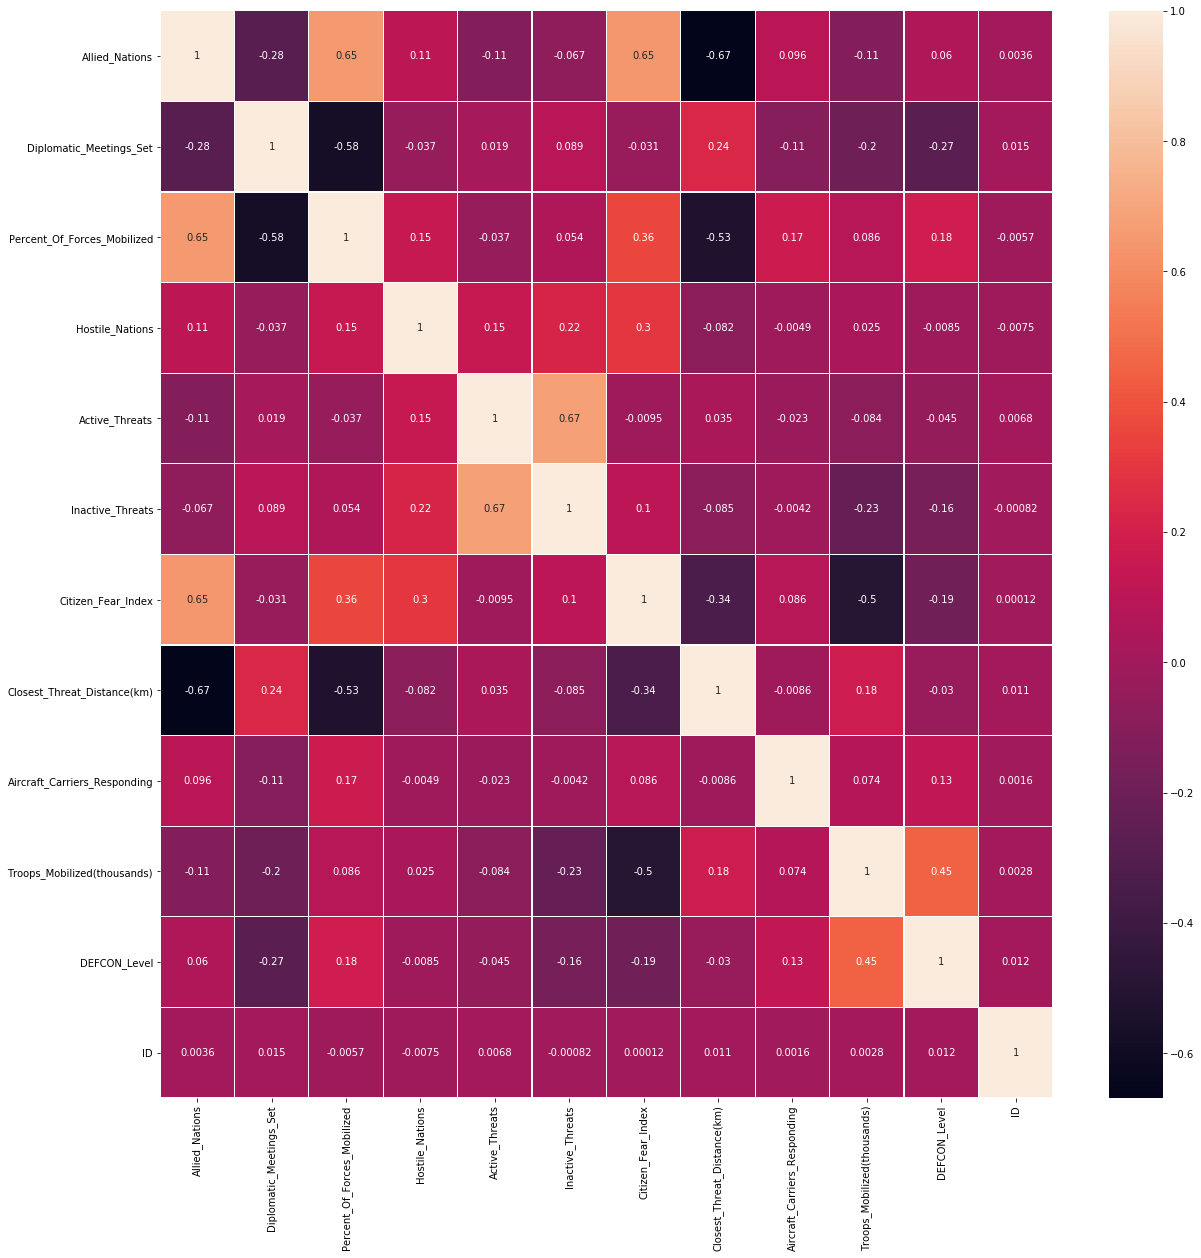

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(train.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [8]:
Y = train['DEFCON_Level']

X = train.drop(['DEFCON_Level', 'ID'], axis=1)
X['Closest_Threat_log'] = np.log(X['Closest_Threat_Distance(km)'])
X['Troops_Mobilized_log'] = np.log(X['Troops_Mobilized(thousands)'])

test['Closest_Threat_log'] = np.log(test['Closest_Threat_Distance(km)'])
test['Troops_Mobilized_log'] = np.log(test['Troops_Mobilized(thousands)'])

combined = pd.concat([X, test.drop(['ID'], axis=1)], axis=0)
display(combined)

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),Closest_Threat_log,Troops_Mobilized_log
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,5.781854,13.667474
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,5.884269,13.773855
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,5.807662,13.636384
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,5.881315,13.736467
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,5.898911,13.782987
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,8,1,0.27,3,5.0,77.0,0.552863,338.14,1,827200.0,5.823460,13.625802
2496,7,1,0.03,3,7.0,15.0,0.588106,363.58,1,827200.0,5.895999,13.625802
2497,10,1,0.25,3,33.0,151.0,0.626285,334.96,1,809600.0,5.814011,13.604296
2498,10,0,0.42,2,5.0,12.0,0.507342,336.02,0,950400.0,5.817171,13.764638


In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Multiply
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.initializers import he_normal
from sklearn.model_selection import train_test_split as tts
from keras import backend as K

def xavier(shape, dtype=None):
    return np.random.rand(*shape)*np.sqrt(1/(17))
def output_w(shape, dtype=None):
    return np.ones(shape)*np.array([0, 0.5, 0.22, 0.22, 0.05, 0.01])

def c_model(shape, lr=0.001):
    i = Input(shape)
    x = Dense(100, activation='relu', kernel_initializer=xavier)(i)
    x = Dense(100, activation='relu', kernel_initializer=xavier)(x)
    x = Dense(100, activation='relu', kernel_initializer=xavier)(x)
    o = Dense(6, activation='softmax', kernel_initializer=xavier)(x)
    
    opt = Adam(lr=lr, amsgrad=True)
    #opt = SGD(lr=lr, momentum=0.25, nesterov=True)
    #opt = Adagrad(lr=lr)
    x = Model(inputs=i, outputs=o)
    x.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return x

Using TensorFlow backend.


In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrr = ReduceLROnPlateau(monitor = 'val_accuracy',
                         patience = 7,
                         verbose = 1,
                         factor = 0.5,
                         min_lr = 1e-5)

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=50,
                   restore_best_weights=True)

epochs = 2000
batch_size = 128

from sklearn.preprocessing import StandardScaler as ss
scale = ss()
scale.fit(combined)

tx, vx, ty, vy = tts(scale.transform(X), Y, test_size=0.25, random_state=121)
model = c_model(tx.shape[1:], 0.003)

history = model.fit(tx, ty, validation_data=(vx, vy),
                    epochs=epochs, batch_size=batch_size,
                    verbose=2, callbacks=[lrr, es])

Train on 7500 samples, validate on 2500 samples
Epoch 1/2000
7500/7500 - 1s - loss: 3.6217 - accuracy: 0.4049 - val_loss: 1.3933 - val_accuracy: 0.4328
Epoch 2/2000
7500/7500 - 0s - loss: 1.1951 - accuracy: 0.4841 - val_loss: 1.1465 - val_accuracy: 0.5100
Epoch 3/2000
7500/7500 - 0s - loss: 1.0830 - accuracy: 0.5355 - val_loss: 1.0802 - val_accuracy: 0.5364
Epoch 4/2000
7500/7500 - 0s - loss: 1.0402 - accuracy: 0.5457 - val_loss: 1.0464 - val_accuracy: 0.5548
Epoch 5/2000
7500/7500 - 0s - loss: 1.0182 - accuracy: 0.5513 - val_loss: 1.0395 - val_accuracy: 0.5600
Epoch 6/2000
7500/7500 - 0s - loss: 1.0105 - accuracy: 0.5487 - val_loss: 1.0511 - val_accuracy: 0.5600
Epoch 7/2000
7500/7500 - 0s - loss: 0.9951 - accuracy: 0.5569 - val_loss: 1.0220 - val_accuracy: 0.5628
Epoch 8/2000
7500/7500 - 0s - loss: 0.9910 - accuracy: 0.5580 - val_loss: 1.0296 - val_accuracy: 0.5612
Epoch 9/2000
7500/7500 - 0s - loss: 0.9904 - accuracy: 0.5581 - val_loss: 1.0305 - val_accuracy: 0.5600
Epoch 10/2000
75

In [11]:
model.evaluate(scale.transform(X), Y)
pred = np.argmax(model.predict(scale.transform(test[X.columns])), axis=1)
n = len(Y)/100
print([(x, sum(Y==x), sum(Y==x)/n) for x in range(1, 6)])
n = len(pred)/100
print([(x, sum(pred==x), sum(pred==x)/n) for x in range(1, 6)])

predictions = pd.DataFrame()
predictions['ID'] = test['ID']
predictions['DEFCON_Level'] = pred
predictions.to_csv("submission.csv", index=False)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.9051 - accuracy: 0.5993
[(1, 498, 4.98), (2, 4270, 42.7), (3, 3910, 39.1), (4, 1212, 12.12), (5, 110, 1.1)]
[(1, 28, 1.12), (2, 1120, 44.8), (3, 1183, 47.32), (4, 168, 6.72), (5, 1, 0.04)]


#These are the percentage of the data per category after trying to peek:
- 1 - 64.44800%
- 2 - 21.15930%
- 3 - 23.09266%
- 4 - 2.870800%
- 5 - 0.060880%